In [1]:
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt
import math
import numpy as np
from pylab import rcParams
import matplotlib
from numpy import trapz
import pandas as pd

In [2]:
rcParams["figure.figsize"]=10, 2.5
matplotlib.rcParams["figure.facecolor"] = "0.9"
matplotlib.rcParams["figure.dpi"] = 100
matplotlib.rcParams["font.size"] = 15

In [3]:
NMR= pd.read_csv("./PUZ-475-ReBPY.csv", header = None, skiprows = 0, sep = "\t")

In [4]:
NMR.columns = ["CS", "intensity", "1"]
print(NMR)

             CS  intensity   1
0      -5.02151  -0.610683 NaN
1      -5.02113  -0.346893 NaN
2      -5.02074   0.842697 NaN
3      -5.02036   1.932830 NaN
4      -5.01998   1.470940 NaN
...         ...        ...  ..
52425  15.02000  -2.516990 NaN
52426  15.02040  -0.390492 NaN
52427  15.02080   0.950281 NaN
52428  15.02120   0.355466 NaN
52429  15.02160  -0.750793 NaN

[52430 rows x 3 columns]


In [5]:
#integeration minimum chemcial shift value of DCM
P1 = [n for n, i in enumerate (NMR.CS) if i>5.4][0]
print("P1 =", P1)
P2 = [n for n, i in enumerate (NMR.CS) if i>5.45][0]
print("P2 =", P2)

P1 = 27261
P2 = 27392


In [6]:
Average_P1 = (NMR.intensity[P1-2]+NMR.intensity[P1-1]+NMR.intensity[P1]+NMR.intensity[P1+1]+NMR.intensity[P1+2])/5
Average_P2 = (NMR.intensity[P2-2]+NMR.intensity[P2-1]+NMR.intensity[P2]+NMR.intensity[P2+1]+NMR.intensity[P2+2])/5
Intensity_min_DCM = (Average_P1+Average_P2)/2
NMR_intensity_corr_DCM = NMR.intensity-Intensity_min_DCM

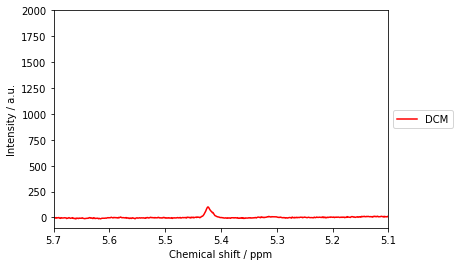

In [7]:
fig, ax = plt.subplots()
ax.plot(NMR.CS, NMR_intensity_corr_DCM, "r", label='DCM')
ax.set_xlim(5.7, 5.1)
ax.set_ylim(-100, 2000)
ax.set_xlabel('Chemical shift / ppm')
ax.set_ylabel('Intensity / a.u.')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [8]:
Peak_int_NMR_DCM = trapz (NMR_intensity_corr_DCM[P1:P2], dx = 1)
print("DCM peak area =", Peak_int_NMR_DCM)

DCM peak area = 3635.2704999999996


In [9]:
#integeration minimum chemcial shift value of formate
P3 = [n for n, i in enumerate (NMR.CS) if i>8.4][0]
print("P3 =", P3)
P4 = [n for n, i in enumerate (NMR.CS) if i>8.45][0]
print("P4 =", P4)

P3 = 35109
P4 = 35240


In [10]:
Average_P3 = (NMR.intensity[P3-2]+NMR.intensity[P3-1]+NMR.intensity[P3]+NMR.intensity[P3+1]+NMR.intensity[P3+2])/5
Average_P4 = (NMR.intensity[P4-2]+NMR.intensity[P4-1]+NMR.intensity[P4]+NMR.intensity[P4+1]+NMR.intensity[P4+2])/5
Intensity_min_formate = (Average_P3+Average_P4)/2
NMR_intensity_corr_formate = NMR.intensity-Intensity_min_formate

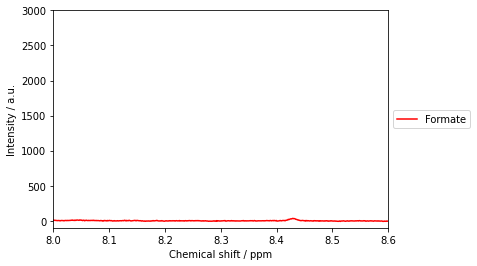

In [11]:
fig, ax = plt.subplots()
ax.plot(NMR.CS, NMR_intensity_corr_formate, "r", label='Formate')
ax.set_xlim(8.0, 8.6)
ax.set_ylim(-100, 3000)
ax.set_xlabel('Chemical shift / ppm')
ax.set_ylabel('Intensity / a.u.')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [12]:
Peak_int_NMR_formate = trapz (NMR_intensity_corr_formate[P3:P4], dx = 1)
print("Formate peak area =", Peak_int_NMR_formate)

Formate peak area = 1444.589252


In [13]:
Ratio = Peak_int_NMR_formate/Peak_int_NMR_DCM
print("Formate/DCM =", Ratio)

Formate/DCM = 0.39738150214681417


In [14]:
Peak_int_sum = []
Peak_int_sum.append(Peak_int_NMR_formate)
Peak_int_sum.append(Peak_int_NMR_DCM)
Peak_int_sum.append(Ratio)

In [15]:
name = ["formate peak area", "DCM peak area", "formate/DCM ratio"]

In [16]:
output_data = pd.DataFrame({"name":name, "peak_area":Peak_int_sum})

In [17]:
output_data

,name,peak_area
0,formate peak area,1444.589252
1,DCM peak area,3635.270500
2,formate/DCM ratio,0.397382
